In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

In [2]:
gas_turbine = pd.read_csv("C://data science//data sets//gas_turbines.csv")

In [4]:
gas_turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [7]:
data = gas_turbine.describe()

In [8]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
##The scales of the data are very different. So, we normalise or standardise the data

# Normalization function 
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)
gas_turbine1 = norm_func(gas_turbine)

In [10]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [19]:
predictors = gas_turbine.iloc[:,0:8]
target = gas_turbine.iloc[:,8]

In [20]:
##Partitioning the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25)

In [21]:
first_model = prep_model([8,50,1])
first_model.fit(np.array(x_train).astype(np.float32),np.array(y_train).astype(np.float32),epochs=900)

Epoch 1/900
353/353 [==============================] - 84s 11ms/step - loss: 377.3349 - accuracy: 0.0000e+00
Epoch 2/900
353/353 [==============================] - 4s 11ms/step - loss: 4.1671 - accuracy: 0.0000e+00
Epoch 3/900
353/353 [==============================] - 3s 9ms/step - loss: 1.6131 - accuracy: 0.0000e+00
Epoch 4/900
353/353 [==============================] - 5s 13ms/step - loss: 0.4675 - accuracy: 0.0000e+00
Epoch 5/900
353/353 [==============================] - 5s 13ms/step - loss: 0.1279 - accuracy: 0.0000e+00 4s - l - ETA: 2s - loss: 0.1448 
Epoch 6/900
353/353 [==============================] - 4s 11ms/step - loss: 0.0489 - accuracy: 0.0000e+00
Epoch 7/900
353/353 [==============================] - 4s 10ms/step - loss: 0.0306 - accuracy: 0.0000e+00 1s - loss: 0.031
Epoch 8/900
353/353 [==============================] - 3s 9ms/step - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 9/900
353/353 [==============================] - 4s 11ms/step - loss: 0.0236 - accuracy: 0.0000

In [26]:
pred_train = first_model.predict(np.array(x_train).astype(np.float32))

In [27]:
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-y_train)**2))

In [28]:
rmse_value 

1.5588460635209496

In [29]:
np.corrcoef(pred_train,y_train)

array([[1.        , 0.99812174],
       [0.99812174, 1.        ]])

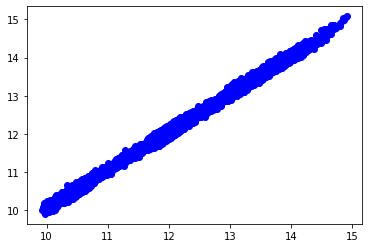

In [30]:
#Visualising 
plt.plot(pred_train,y_train,"bo")

In [31]:
##Predicting on test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))

In [32]:
rmse_test

1.6132745640419683

In [33]:
np.corrcoef(pred_test,y_test)

array([[1.        , 0.99810473],
       [0.99810473, 1.        ]])

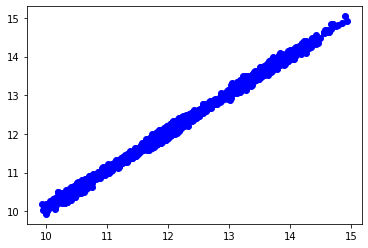

In [34]:
##Visualizing
plt.plot(pred_test,y_test,"bo")